In [34]:
#Import necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

import opendatasets as od 

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm 
# import warnings filter
import warnings #import simplefilter
# ignore all future warnings

from sklearn.decomposition import PCA

In [3]:
#Download the ALS patients dataset from bellevue.edu
od.download("https://content.bellevue.edu/cst/dsc/630/als_data.csv")

Using downloaded and verified file: .\als_data.csv


In [4]:
#Read csv into python dataframe
als_df = pd.read_csv("als_data.csv")
als_df.head(5)
print(als_df.shape)

(2223, 101)


### 1. Remove any data that is not relevant to the patient’s ALS condition.

In [5]:
#Dropping the columns Subject ID and ID are irrelevant to the patients condition
als_df = als_df.drop(['ID','SubjectID'], axis=1)
als_df.shape

(2223, 99)

### 2. Apply a standard scalar to the data.

In [6]:
X = StandardScaler().fit_transform(als_df.values)
X.shape

(2223, 99)

### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

##### Elbow Method

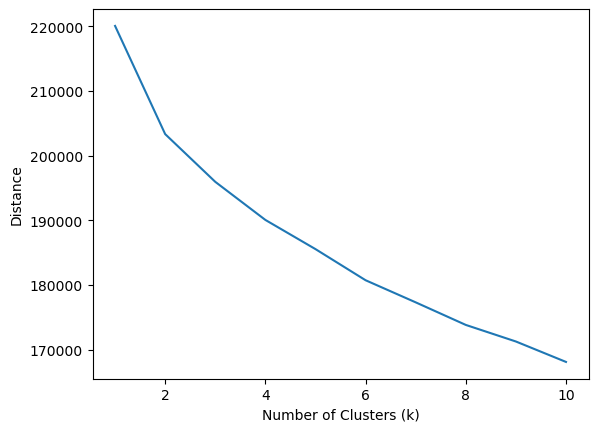

In [27]:
range_n_clusters = [1, 2, 3, 4, 5, 6]
avg_distance=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

There is a fall in the slope at 2 making this an optimal point of k where an elbow occurs.

##### Silhouette Method

For n_clusters = 2 The average silhouette_score is : 0.07878005888570402
For n_clusters = 3 The average silhouette_score is : 0.0687707291658565
For n_clusters = 4 The average silhouette_score is : 0.06973816142698218
For n_clusters = 5 The average silhouette_score is : 0.05697679932842005
For n_clusters = 6 The average silhouette_score is : 0.06477886829610223


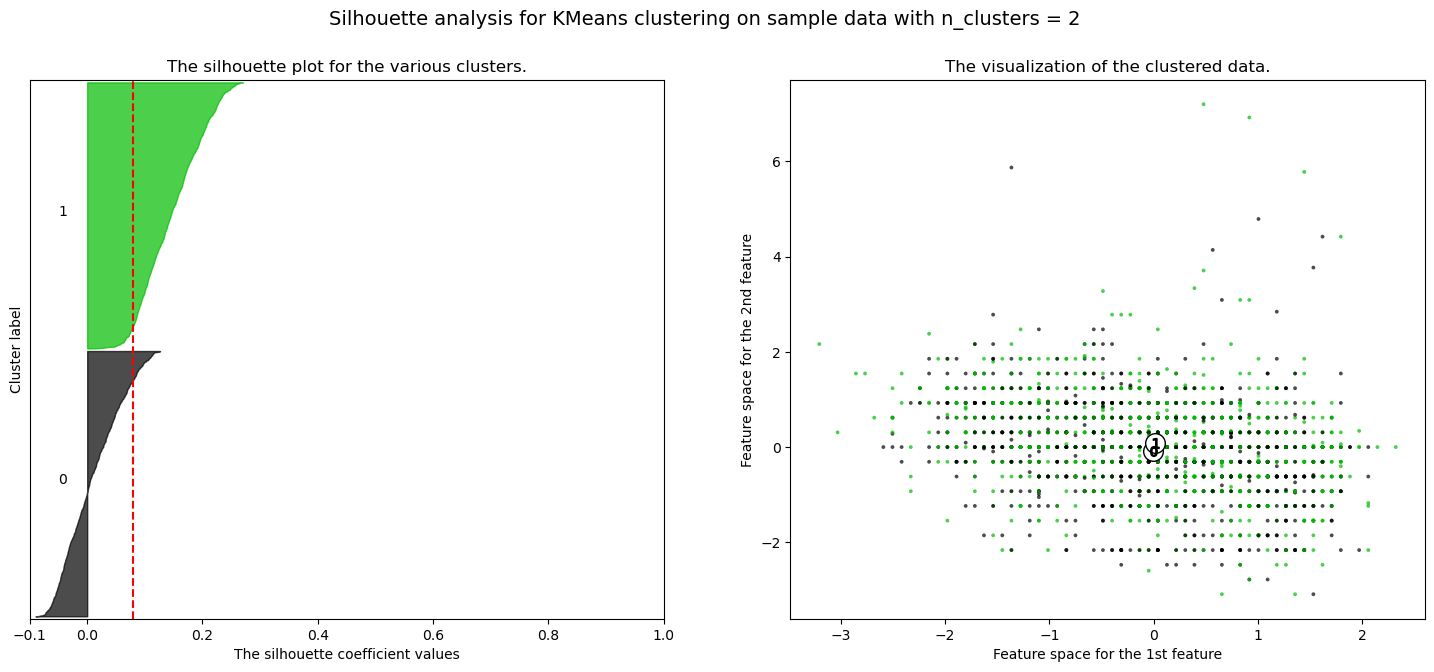

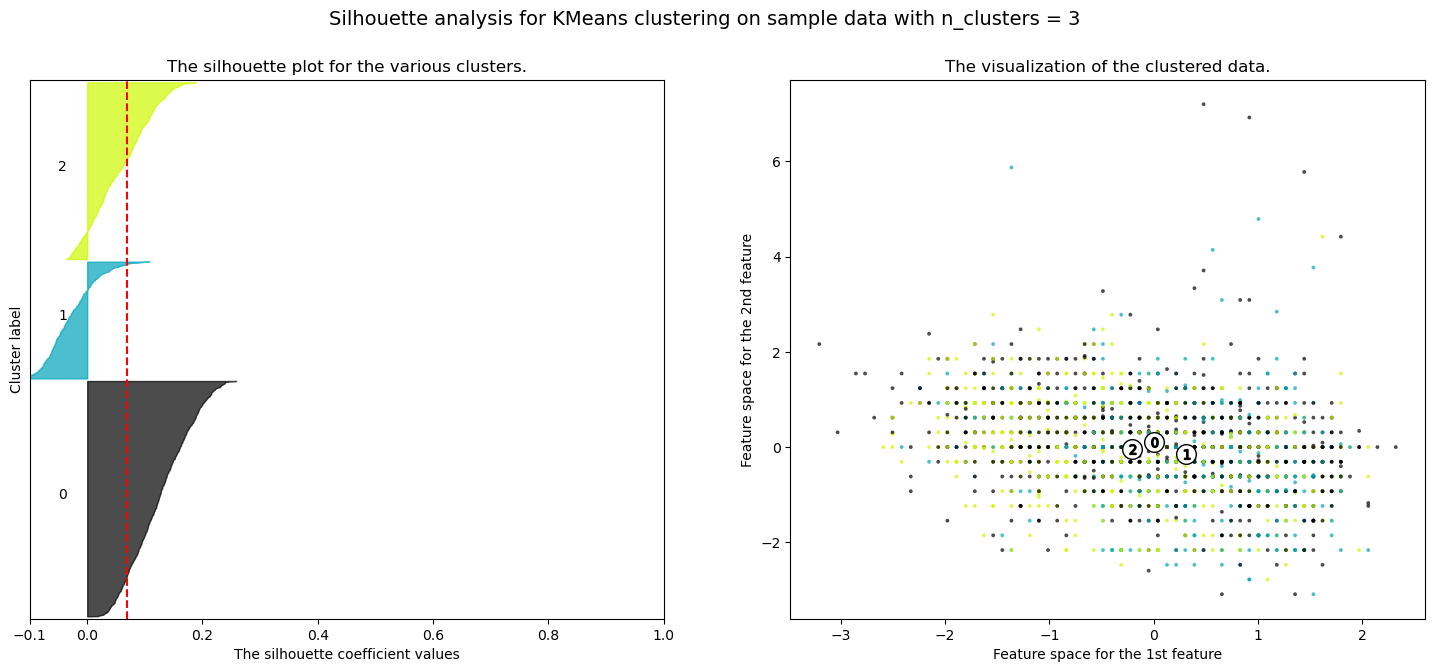

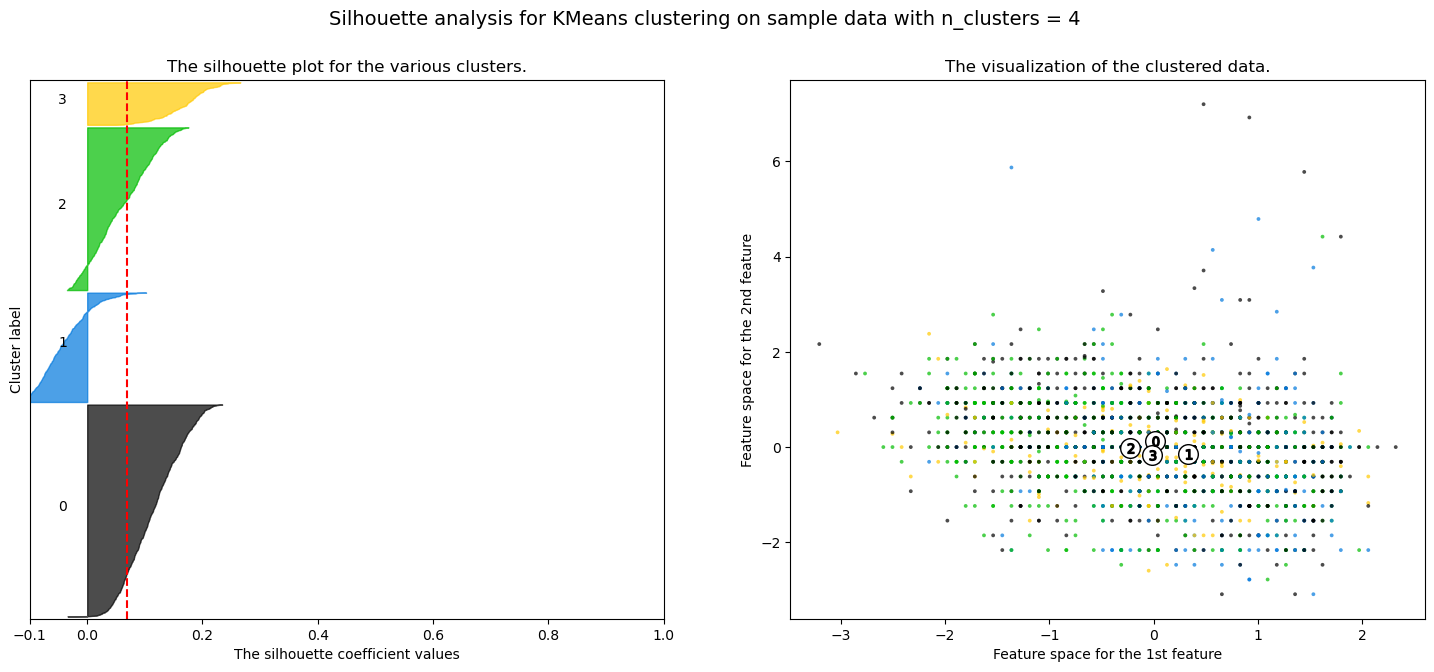

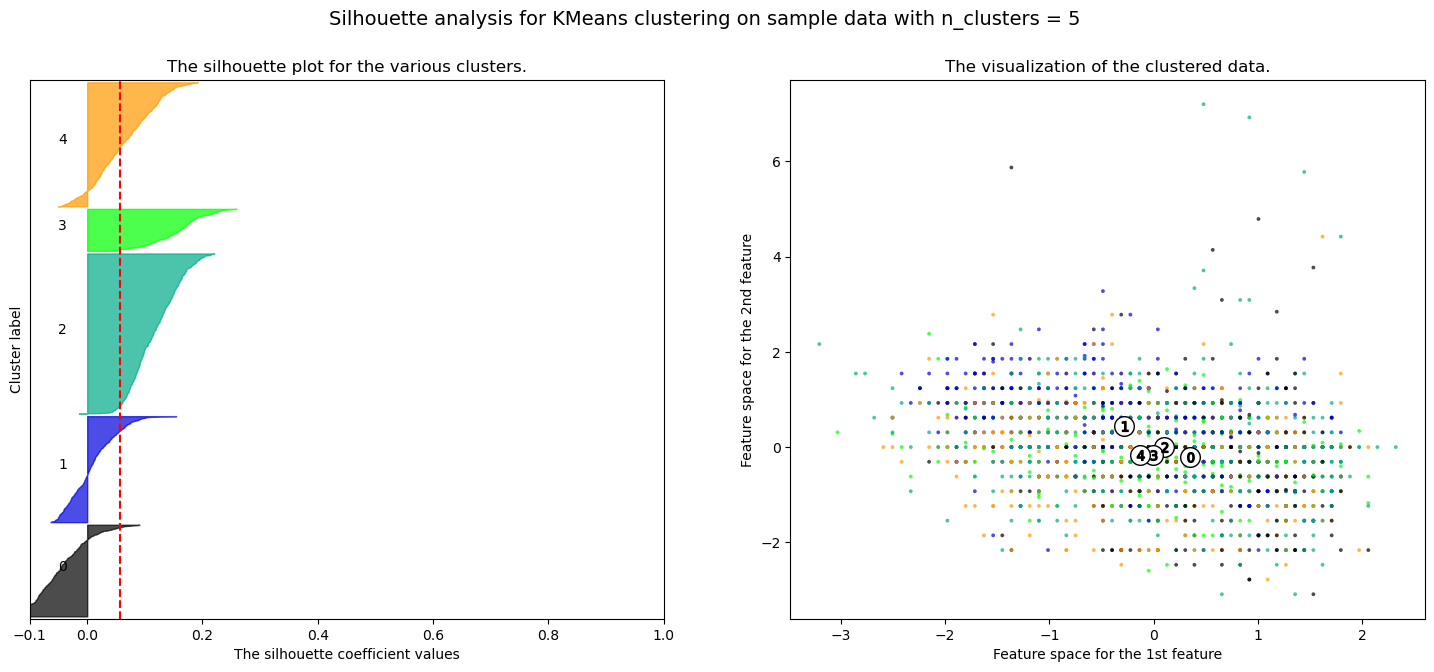

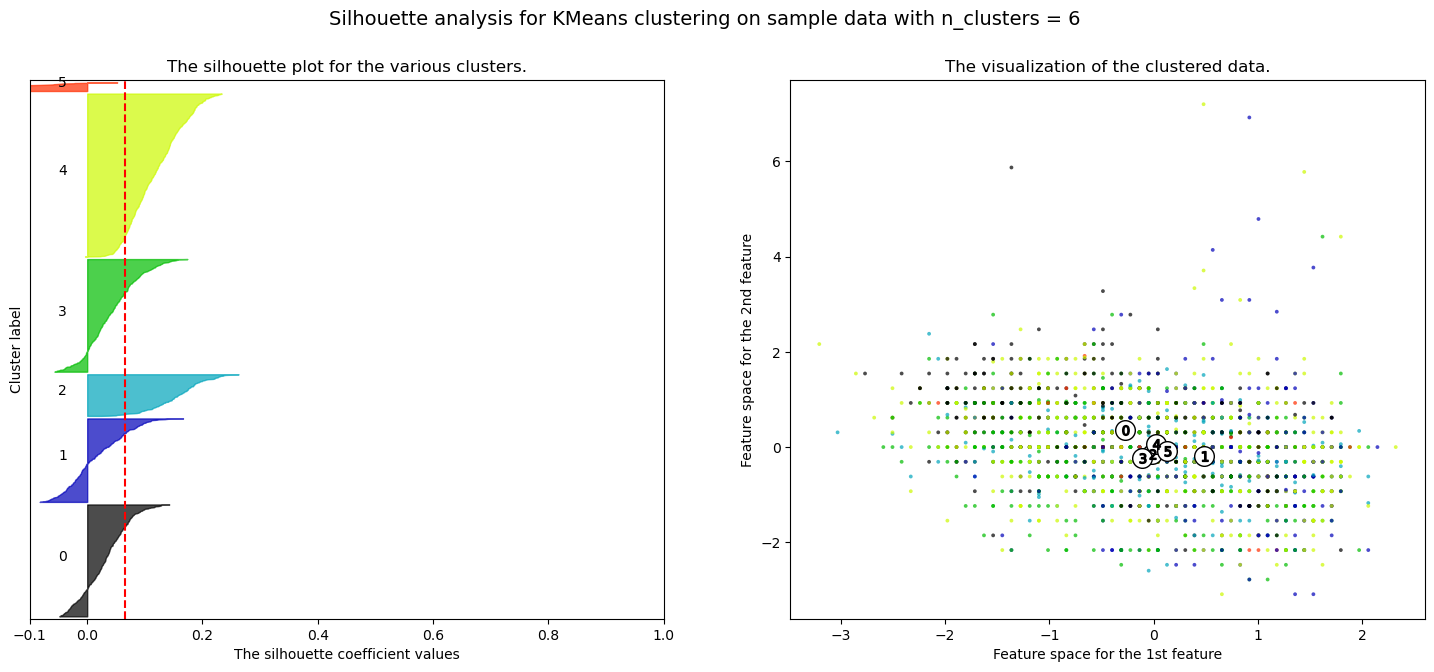

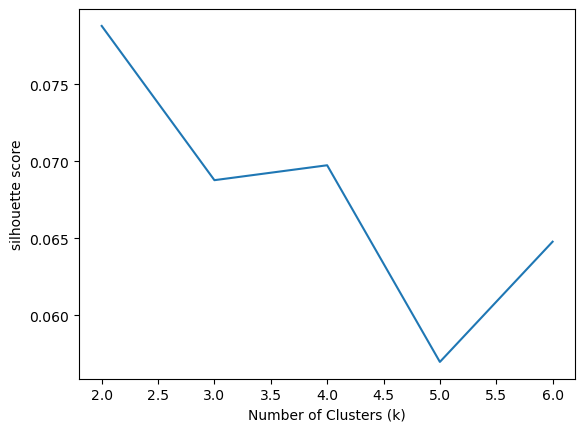

In [29]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14 )

plt.show()


#style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

### 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.


Considering a good average silhouette score to be 0.6, we can see that all the clusters have an average or above average silhouette score (closer to 1), so none of the cluster values can be considered bad picks for the given dataset. 
However, plotting the average silhouette scores for each k shows that the best choice for k is 2 since it has the maximum score (0.07878005888570402). The same can be seen with the elbow method.

### 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [32]:
## Using cluster value as 2
kmeans = KMeans(n_clusters=2,random_state=42)
y_pred = clusterer.fit_predict(X)

In [66]:
X.shape

(2223, 99)

### 6. Fit a PCA transformation with two features to the scaled data.


In [111]:
# PCA with 2 components
pca = PCA(n_components=2)

# Fit the PCA
als_pca = pca.fit_transform(X)
 
# Convert the array to a dataframe
als_pca_df = pd.DataFrame(data=als_pca, columns = ['PC1', 'PC2'])
# Add the cluster label to the dataframe
als_pca_df['Cluster'] = y_pred
# View the dataframe
als_pca_df

,PC1,PC2,Cluster
0,-1.426745,-2.319821,1
1,-1.440234,-4.871695,1
2,1.617854,-0.428724,3
3,-1.919993,2.095371,4
4,0.297709,0.166822,3
...,...,...,...
2218,-4.477580,1.200880,4
2219,-0.398958,-1.877658,1
2220,-0.432900,4.244527,0
2221,-0.330782,3.316474,0


In [132]:
# PCA with 0.95 components - Preserving 95% variability
pca95 = PCA(n_components=0.95)

# Fit the PCA
als_pca95 = pca95.fit_transform(X)

### 7. Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

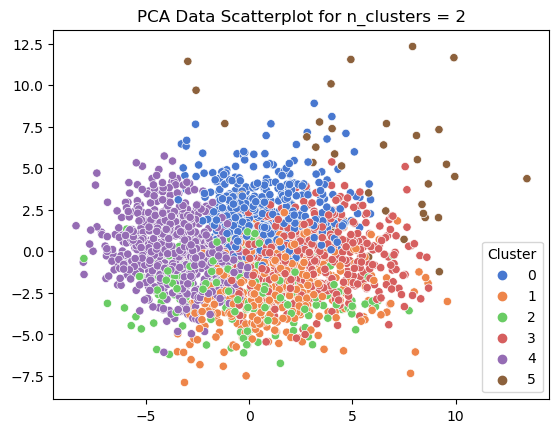

In [138]:
sns.scatterplot(x=als_pca[:,0],y= als_pca[:,1], hue=als_pca_df['Cluster'], palette="muted")
plt.title('PCA Data Scatterplot for n_clusters = 2')

plt.show()

We can see that the six classes are not distinct and separable.  

### 8. Summarize your results and make a conclusion.

Explained Variance Ratio is a metric to evaluate the usefulness of principal components and to choose the required number of components in PCA model.

In [112]:
# Show the variance between the two features within the PCA.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
#Taking the sum of the above array will return the total variance explained by each of the selected components
print(np.cumsum(pca.explained_variance_ratio_*100))

print ( "Components: ", pca.n_components_ , "\nExplained Variance Ratio: ",
       round(pca.explained_variance_ratio_.sum(),2), "\nExplained Variance Ratio Percentage: ",
       round((pca.explained_variance_ratio_.sum()*100),0), "%")

[0.11330548 0.06446616]
[11.33054801 17.77716374]
Components:  2 
Explained Variance Ratio:  0.18 
Explained Variance Ratio Percentage:  18.0 %


The first component captures about 11% of the variability in the dataset and the second component captures about 18% of the variability in the dataset.  

In [139]:
# Show the variance between the 95 features within the PCA.
explained_variance95 = pca95.explained_variance_ratio_
#print(explained_variance95)

print(als_pca95.shape)
print(np.cumsum(pca95.explained_variance_ratio_*100))

print ( "Components: ", pca95.n_components_ , "\nExplained Variance Ratio: ",
       round(pca95.explained_variance_ratio_.sum(),2), "\nExplained Variance Ratio Percentage: ",
       round((pca95.explained_variance_ratio_.sum()*100),0), "%")

#This means the algorithm has found 51 principal components to preserve 95% of the variability in the data.

(2223, 51)
[11.33054801 17.77716422 23.99783515 28.68285436 33.01802793 36.97855333
 40.63106296 43.6899421  46.60948437 49.45114771 52.261072   54.91592997
 57.27689185 59.52139181 61.4972152  63.42645056 65.29367809 67.02418318
 68.72087263 70.39066976 71.90290606 73.34905753 74.75731891 76.10100861
 77.40957246 78.62924786 79.78411219 80.92651388 82.01868752 83.02175144
 83.95510689 84.85985614 85.69405746 86.45576388 87.20433762 87.92015811
 88.59692932 89.2091541  89.80772165 90.39619586 90.97393967 91.54459472
 92.03275947 92.47197562 92.88669521 93.29690325 93.67715102 94.04412358
 94.3943873  94.72853861 95.03388671]
Components:  51 
Explained Variance Ratio:  0.95 
Explained Variance Ratio Percentage:  95.0 %


We will need to choose the number of components to include in our model by adding the explained variance ratio of each component until we reach a total of around 0.8 or 80% to avoid overfitting. From the above we can see that we achieve 80% around 27 index. Which makes 27 the ideal number of components to include in our model. 

In [149]:
# PCA with 27 components 
pca27 = PCA(n_components=27)

# Fit the PCA
als_pca27 = pca27.fit_transform(X)

In [150]:
# Show the variance between the 27 features within the PCA.
explained_variance27 = pca27.explained_variance_ratio_
#print(explained_variance95)

print(als_pca27.shape)
print(np.cumsum(pca27.explained_variance_ratio_*100))

print ( "Components: ", pca27.n_components_ , "\nExplained Variance Ratio: ",
       round(pca27.explained_variance_ratio_.sum(),2), "\nExplained Variance Ratio Percentage: ",
       round((pca27.explained_variance_ratio_.sum()*100),0), "%")

#This means the algorithm has found 51 principal components to preserve 95% of the variability in the data.

(2223, 27)
[11.33054801 17.77716417 23.99783503 28.68285329 33.01802681 36.97855193
 40.63105519 43.68991785 46.60945789 49.45111909 52.26104073 54.91589297
 57.27675844 59.5211446  61.49643199 63.4256169  65.29250974 67.0214756
 68.71804571 70.38458662 71.8961343  73.34045553 74.74786173 76.08894146
 77.39327485 78.61151636 79.7611911 ]
Components:  27 
Explained Variance Ratio:  0.8 
Explained Variance Ratio Percentage:  80.0 %


#### References

1. Sklearn.preprocessing.StandardScaler. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

2. Pramoditha, R. (2023, February 2). Principal Component Analysis (PCA) with Scikit-Learn. Medium. https://medium.com/data-science-365/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0 